In [1]:
from glycan import glycan
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
def read_H3N2_data():
    # Create an instance of the glycan class
    g = glycan()

    # Read data (CSV files) as pandas data frames. Each file is a new line.
    # Note that each file can have multiple experiments, called "tabs" here.
    # You can specify how many tabs you want to read using the totalTabs variable.

    # The "wh" parameter simply controls the format of the CSV file.
    # The 'old' format is slightly different from the 'new' format, but has the same information
    numberedExcel1, b = g.getData('Data/H3N2_EGG/H3N2_sheet1.csv', totalTabs=2, startExp=1)
    numberedExcel2, b = g.getData('Data/H3N2_EGG/H3N2_sheet2.csv', totalTabs=2, startExp=(b+1))
    numberedExcel3, b = g.getData('Data/H3N2_EGG/H3N2_sheet3.csv', totalTabs=2, startExp=(b+1))

    # Now combine all the data frames
    h3n2 = pd.concat([numberedExcel1, numberedExcel2, numberedExcel3], axis=0)
    h3n2.reset_index(drop=True, inplace=True)

    # Scaling the mean viral fluorescence by glycan density.
    h3n2['MVF'] = h3n2.MVF/h3n2.GlycDen
    
    return h3n2

In [3]:
h3n2 = read_H3N2_data()

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# Function to get accuracy, precision, recall, and f-1 score for a given number of iterations
def getAcc(MI):
    g = glycan()
    X_train, Y_train, X_test, Y_test, bindData = g.getTrainTest(h3n2, cutoff = 0.15, dropDP=True, test_size=0.33)
    #clf_mdck = svm.SVC(max_iter=MI, verbose=True)
    clf_mdck = svm.SVC(max_iter=MI, verbose=False)
    clf_mdck.fit(X_train, Y_train)
    preds_train = clf_mdck.predict(X_train)
    preds_test = clf_mdck.predict(X_test)
    acc = accuracy_score(Y_test,preds_test)
    prec = precision_score(Y_test, preds_test)
    rec = recall_score(Y_test, preds_test)
    f1 = f1_score(Y_test, preds_test)
    return acc, prec, rec, f1

In [5]:
# Vary number of iterations from 100 through 2000, in steps of 100

accList = np.zeros(20)
precList = np.zeros(20)
recList = np.zeros(20)
f1List = np.zeros(20)

count = 0
for MI in range(0,200,10):
    a, b, c, d = getAcc(MI)
    accList[count] = a
    precList[count] = b
    recList[count] = c
    f1List[count] = d
    count += 1

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=90).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=120).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=180).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

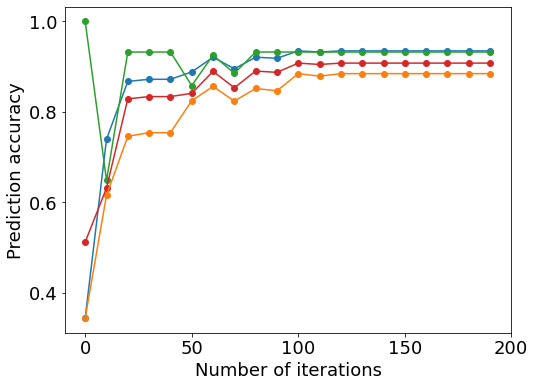

In [6]:
# Plot the 4 performance metrices wrt number of iterations
plt.figure(figsize=(8,6))
xVals = np.arange(0,200,10)
plt.scatter(xVals, accList, label='Accuracy')
plt.scatter(xVals, precList, label='Precision')
plt.scatter(xVals, recList, label='Recall')
plt.scatter(xVals, f1List, label='F1 score')
plt.plot(xVals, accList)
plt.plot(xVals, precList)
plt.plot(xVals, recList)
plt.plot(xVals, f1List)

plt.xticks(np.arange(0, 201, 50), fontsize=18)
plt.yticks(np.arange(0.4, 1.05, 0.2), fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("Prediction accuracy", fontsize=18)

plt.savefig("Plots/H3N2_convergence.pdf")

In [7]:
# Save the data file if needed
acc = np.column_stack((xVals, accList, precList, recList, f1List))
np.savetxt("Results/H3N2_all.txt", acc)